In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("A:\SAINS DATA SMT 3\Analisis Data Eksploratif\employee_survey.csv")
df

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
total

EmpID                    0
Stress                   0
TrainingHoursPerYear     0
haveOT                   0
EduLevel                 0
NumReports               0
TeamSize                 0
NumCompanies             0
CommuteDistance          0
CommuteMode              0
SleepHours               0
Workload                 0
Gender                   0
PhysicalActivityHours    0
WorkEnv                  0
WLB                      0
EmpType                  0
Dept                     0
Experience               0
JobLevel                 0
MaritalStatus            0
Age                      0
JobSatisfaction          0
dtype: int64

In [6]:
df = df[['WLB', 'JobSatisfaction', 'Stress', 'WorkEnv']]

# Memeriksa data untuk memastikan tidak ada nilai NaN
print(df.isnull().sum())

WLB                0
JobSatisfaction    0
Stress             0
WorkEnv            0
dtype: int64


In [8]:
# Mendefinisikan variabel independen dan dependen
import statsmodels.api as sm
X = df[['WLB', 'Stress', 'WorkEnv']]
y = df['JobSatisfaction']

# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

# Membuat model regresi linier
model = sm.OLS(y, X).fit()

# Melihat hasil regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.89e-124
Time:                        16:20:52   Log-Likelihood:                -4704.2
No. Observations:                3025   AIC:                             9416.
Df Residuals:                    3021   BIC:                             9440.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4727      0.074     33.227      0.0

In [10]:

# Matriks korelasi
correlation_matrix = df.corr()
print(correlation_matrix)


                      WLB  JobSatisfaction    Stress   WorkEnv
WLB              1.000000         0.259687  0.003595  0.005751
JobSatisfaction  0.259687         1.000000 -0.214383  0.248730
Stress           0.003595        -0.214383  1.000000 -0.013791
WorkEnv          0.005751         0.248730 -0.013791  1.000000


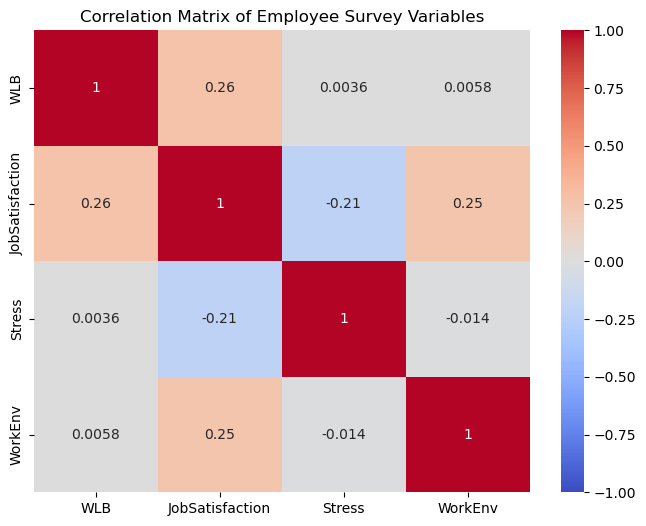

In [11]:

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Employee Survey Variables")
plt.show()

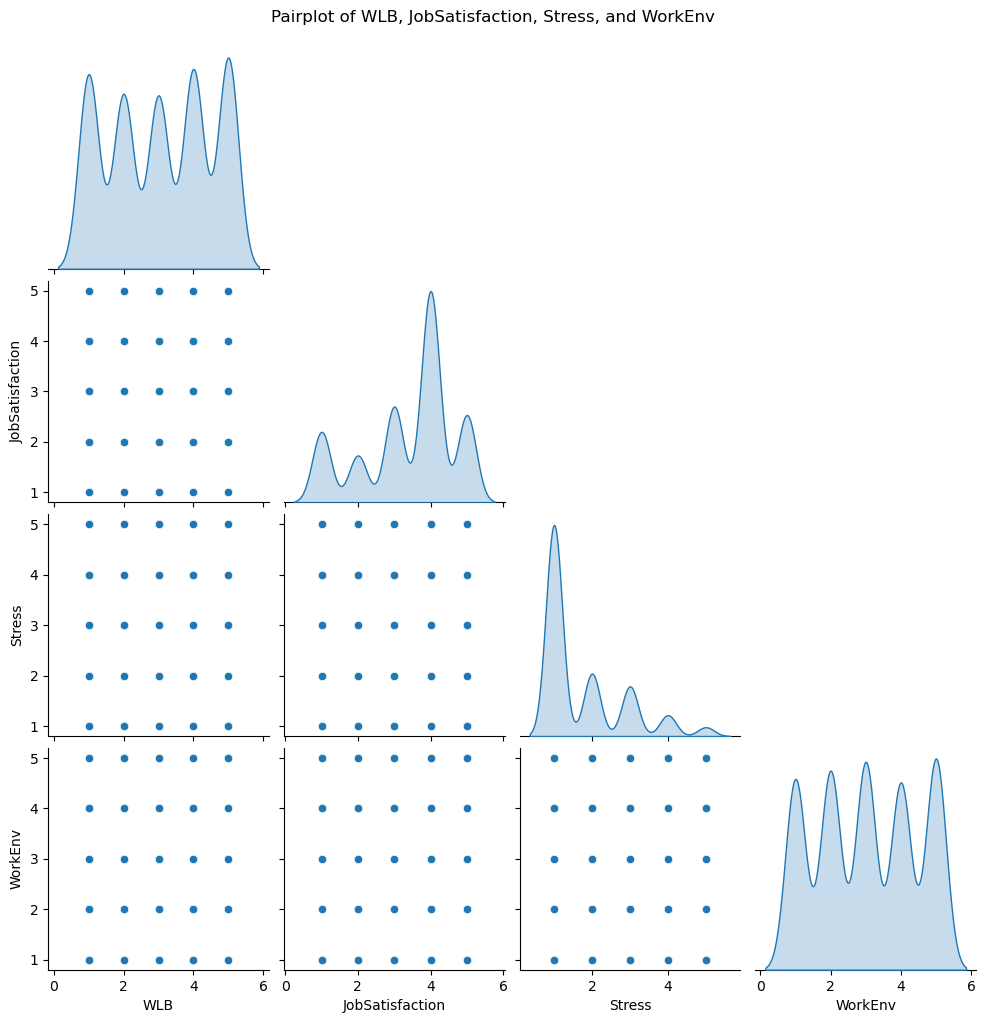

In [12]:

# Visualisasi pairplot
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of WLB, JobSatisfaction, Stress, and WorkEnv", y=1.02)
plt.show()

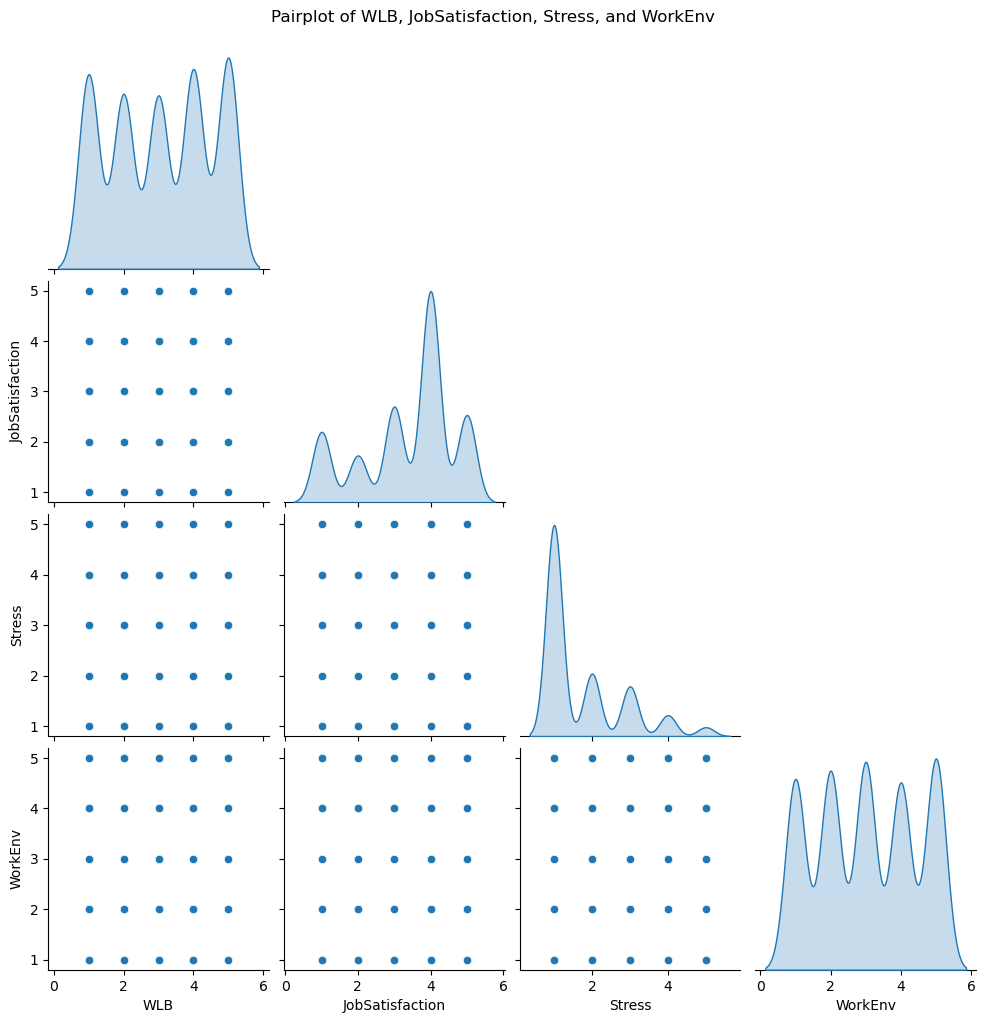

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat pairplot untuk kolom WLB, JobSatisfaction, Stress, dan WorkEnv
sns.pairplot(df, diag_kind='kde', corner=True, vars=['WLB', 'JobSatisfaction', 'Stress', 'WorkEnv'])

# Menambahkan judul plot
plt.suptitle("Pairplot of WLB, JobSatisfaction, Stress, and WorkEnv", y=1.02)
plt.show()



In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot()

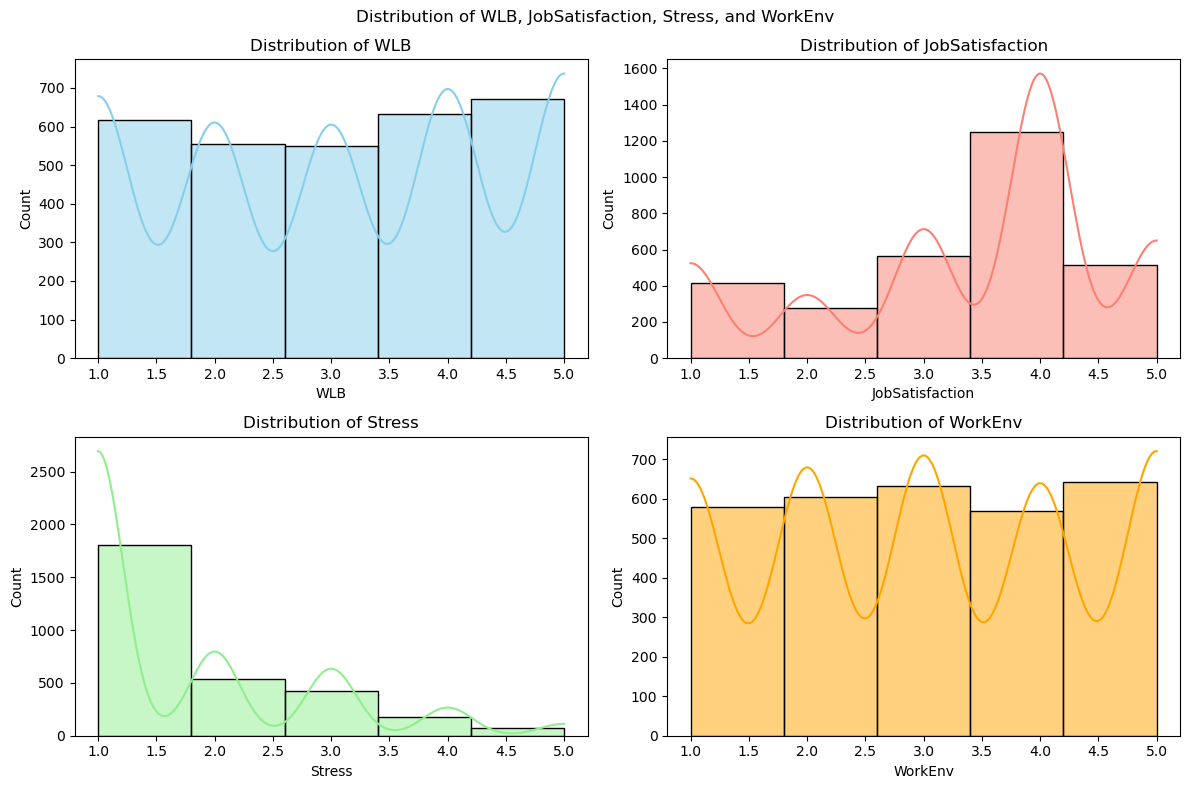

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of WLB, JobSatisfaction, Stress, and WorkEnv")

# Plot untuk WLB
sns.histplot(df['WLB'], bins=5, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution of WLB")

# Plot untuk JobSatisfaction
sns.histplot(df['JobSatisfaction'], bins=5, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Distribution of JobSatisfaction")

# Plot untuk Stress
sns.histplot(df['Stress'], bins=5, kde=True, ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Distribution of Stress")

# Plot untuk WorkEnv
sns.histplot(df['WorkEnv'], bins=5, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Distribution of WorkEnv")

plt.tight_layout()
plt.show()


In [6]:
# Instalasi pustaka semopy (jalankan ini jika belum terinstal)
# !pip install semopy

import pandas as pd
from semopy import Model, Optimizer, plot_model
import matplotlib.pyplot as plt

# Memilih kolom yang relevan untuk analisis jalur
df = df[['Workload', 'SleepHours', 'WLB', 'JobSatisfaction']]

# Definisikan model jalur (path model)
model_desc = """
WLB ~ Workload + SleepHours
JobSatisfaction ~ WLB + Workload
"""

# Membuat dan menyesuaikan model
model = Model(model_desc)
opt = Optimizer(model)
opt.optimize(df)

# Menampilkan hasil estimasi
print(opt.summary())

# Visualisasi model jalur
plot_model(model)
plt.title("Path Analysis Model")
plt.show()


ModuleNotFoundError: No module named 'semopy'